In [1]:
import pandas as pd
df = pd.read_csv(r"dataset\df_agrégé.csv")
df

C:\Users\antho\AppData\Local\Temp\ipykernel_27824\280577533.py:2: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"dataset\df_agrégé.csv")


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,surface_reelle_bati,nombre_pieces_principales,type_local,longitude,latitude,prix_m2
0,2020-100,2020-01-14,1,Vente,230000.0,704.0,ALL DES FAUVETTES,0425,1340.0,1024,Attignat,1,01024000AA0146,1.0,121.0,6.0,Maison,5.157931,46.295991,1900
1,2020-1000,2020-05-19,1,Vente,446000.0,840.0,CHE DE LA CRAZ,0200,1250.0,1254,Montagnat,1,01254000AR0059,1.0,145.0,4.0,Maison,5.291816,46.167303,3075
2,2020-10000,2020-12-11,1,Vente,310000.0,410.0,AV DE CHATEAU LARRON,0210,1300.0,1034,Belley,1,01034000AL0435,1.0,131.0,4.0,Maison,5.688519,45.764457,2366
3,2020-1000002,2020-05-27,1,Vente,107000.0,17.0,GR GRANDE RUE,0035,71460.0,71214,Genouilly,71,712140000A0536,1.0,365.0,11.0,Maison,4.573344,46.651477,293
4,2020-1000004,2020-06-12,1,Vente,183000.0,16.0,LES COURS RICAUT,B043,71240.0,71402,Saint-Cyr,71,714020000C1458,1.0,136.0,5.0,Maison,4.891170,46.674844,1345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750829,2024-999992,2024-11-20,1,Vente,165070.0,80.0,RUE ANDRE LAZES,0105,83600.0,83061,Fréjus,83,83061000BI1235,2.0,32.0,1.0,Appartement,6.749200,43.424746,5158
4750830,2024-999994,2024-11-14,1,Vente,191993.0,1761.0,LE BLAVET,B018,83520.0,83107,Roquebrune-sur-Argens,83,83107000CS0737,2.0,43.0,2.0,Appartement,6.654664,43.489201,4464
4750831,2024-999995,2024-11-05,1,Vente,205000.0,256.0,CHE DE GUERINGUIER,0390,83460.0,83004,Les Arcs,83,830040000C2657,1.0,155.0,6.0,Maison,6.478964,43.451738,1322
4750832,2024-999998,2024-11-27,1,Vente,170000.0,214.0,CHE SAINT JOSEPH,1952,83600.0,83061,Fréjus,83,83061000AY0992,2.0,58.0,3.0,Appartement,6.731482,43.443118,2931


In [20]:
df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'code_type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'type_local',
       'longitude', 'latitude', 'prix_m2'],
      dtype='object')

In [21]:
df["prix_m2"].describe()

count    4.750834e+06
mean     3.177304e+03
std      1.434155e+04
min      1.000000e+00
25%      1.521000e+03
50%      2.415000e+03
75%      3.775000e+03
max      1.593750e+07
Name: prix_m2, dtype: float64

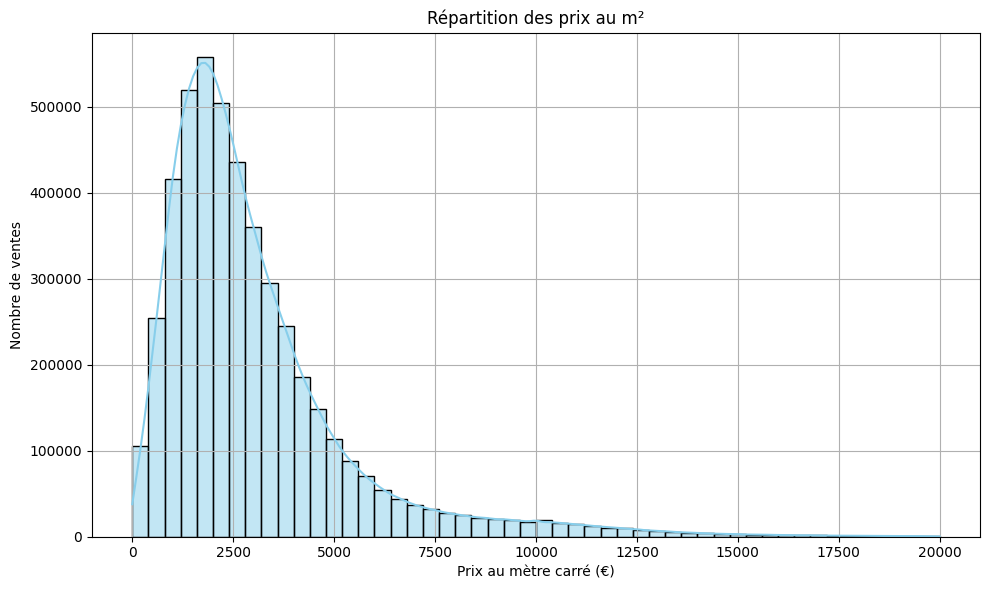

In [22]:
# visualisons la repartition des prix au m2:
import matplotlib.pyplot as plt
import seaborn as sns

# Option : limiter les valeurs extrêmes pour mieux lire la distribution
df1_filtered = df[df['prix_m2'] < 20000]

plt.figure(figsize=(10, 6))
sns.histplot(df1_filtered['prix_m2'], bins=50, kde=True, color='skyblue')
plt.title("Répartition des prix au m²")
plt.xlabel("Prix au mètre carré (€)")
plt.ylabel("Nombre de ventes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#gardons les lignes pour lesquelles le prix_m2 est inferieur a 15000:
df_filtre=df[df['prix_m2'] < 15000]


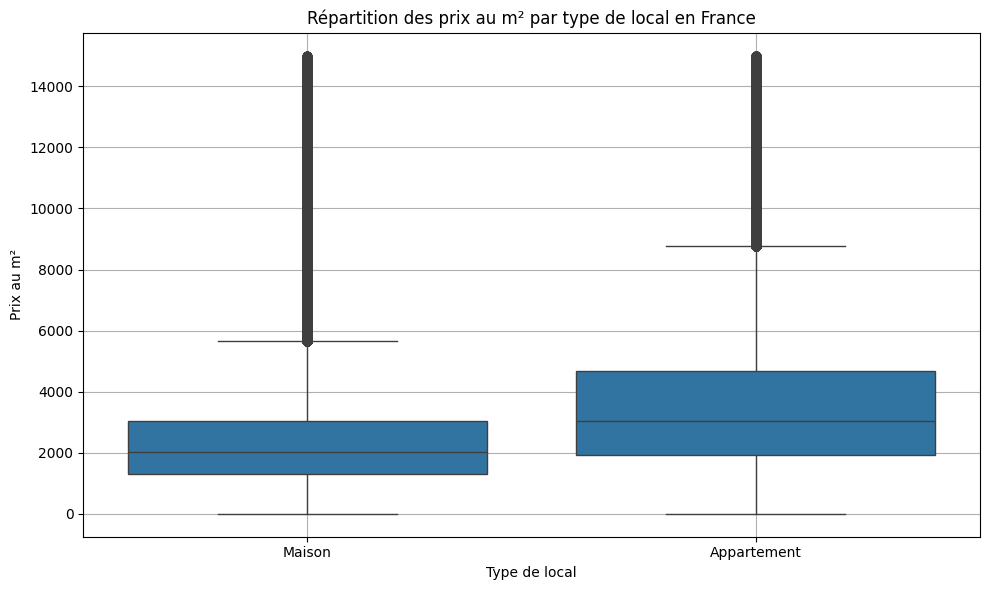

In [19]:
#regardons la repartition des prix au m2 par type de local:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='type_local', y='prix_m2', data=df_filtre)
plt.title("Répartition des prix au m² par type de local en France")
plt.xlabel("Type de local")
plt.ylabel("Prix au m²")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Les appartements sont plus onereux au m2 que les maisons: cela s'explique car les appartements sont souvent situés en coeur de ville là où l'immobilier coute le plus cher au m2

In [24]:
df["surface_reelle_bati"].describe()


count    4.750834e+06
mean     8.807842e+01
std      1.369031e+02
min      1.000000e+00
25%      5.500000e+01
50%      8.000000e+01
75%      1.070000e+02
max      1.735590e+05
Name: surface_reelle_bati, dtype: float64

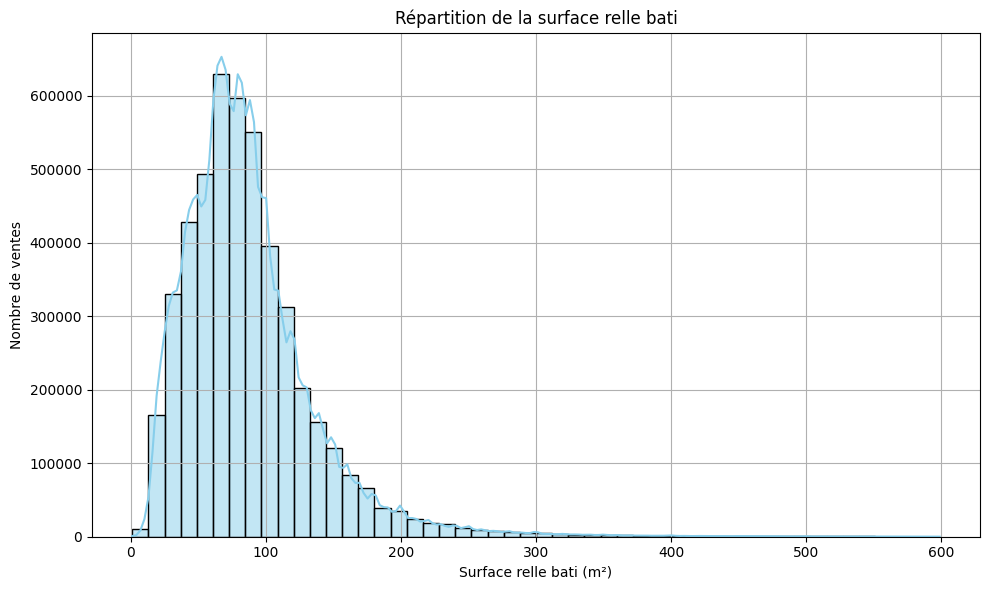

In [30]:
# Option : limiter les valeurs extrêmes pour mieux lire la distribution
df2_filtered = df[df['surface_reelle_bati'] < 600]

plt.figure(figsize=(10, 6))
sns.histplot(df2_filtered['surface_reelle_bati'], bins=50, kde=True, color='skyblue')
plt.title("Répartition de la surface relle bati")
plt.xlabel("Surface relle bati (m²)")
plt.ylabel("Nombre de ventes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#gardons les lignes pour lesquelles la surface bati est inferieur a 350 m2:
df_filtre=df[df['surface_reelle_bati'] < 350]

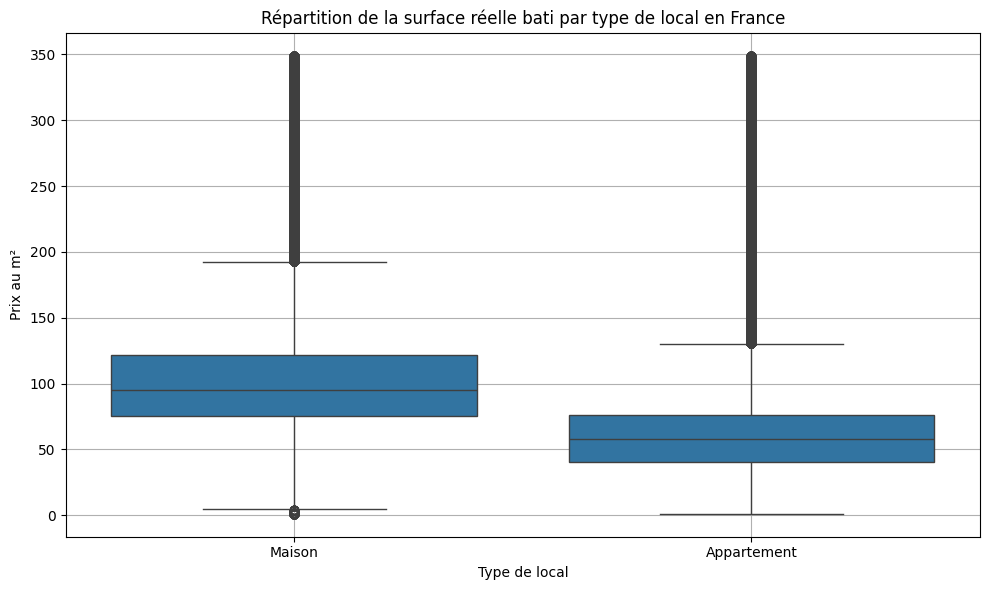

In [ ]:
# regardons la repartition de la surface reelle bati par type de local:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_local', y='surface_reelle_bati', data=df_filtre)
plt.title("Répartition de la surface réelle bati par type de local en France")
plt.xlabel("Type de local")
plt.ylabel("Prix au m²")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
df["valeur_fonciere"].describe()

count    4.750834e+06
mean     2.547671e+05
std      8.567129e+05
min      1.000000e+00
25%      1.117000e+05
50%      1.800000e+05
75%      2.899000e+05
max      7.225900e+08
Name: valeur_fonciere, dtype: float64

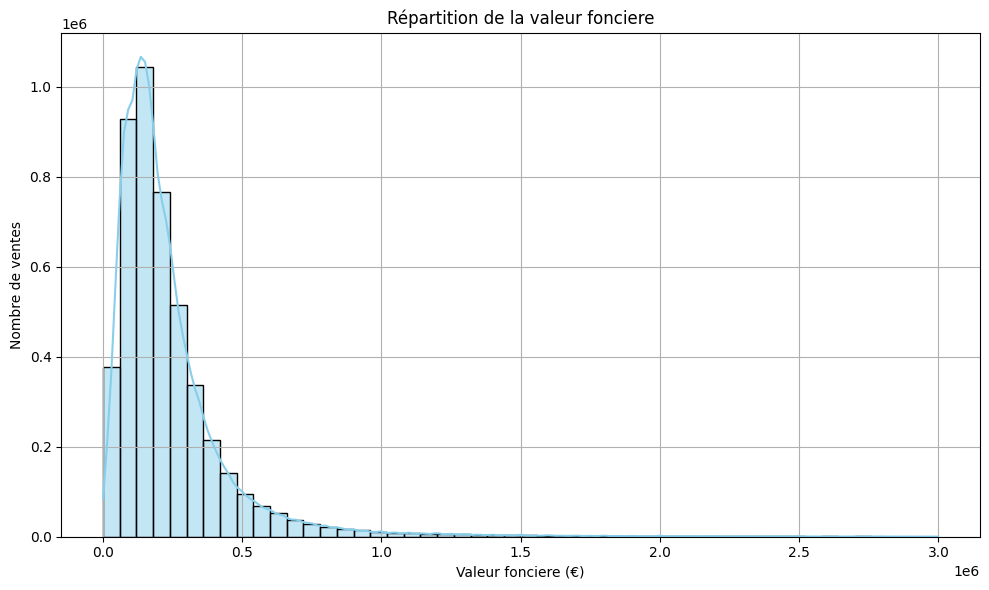

In [39]:
# Option : limiter les valeurs extrêmes pour mieux lire la distribution
df3_filtered = df[df['valeur_fonciere'] < 3000000]

plt.figure(figsize=(10, 6))
sns.histplot(df3_filtered['valeur_fonciere'], bins=50, kde=True, color='skyblue')
plt.title("Répartition de la valeur fonciere")
plt.xlabel("Valeur fonciere (€)")
plt.ylabel("Nombre de ventes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#gardons les lignes pour lesquelles la valeur fonciere est inferieur a 1 500 000 euros:
df_filtre=df[df['valeur_fonciere'] < 1500000]

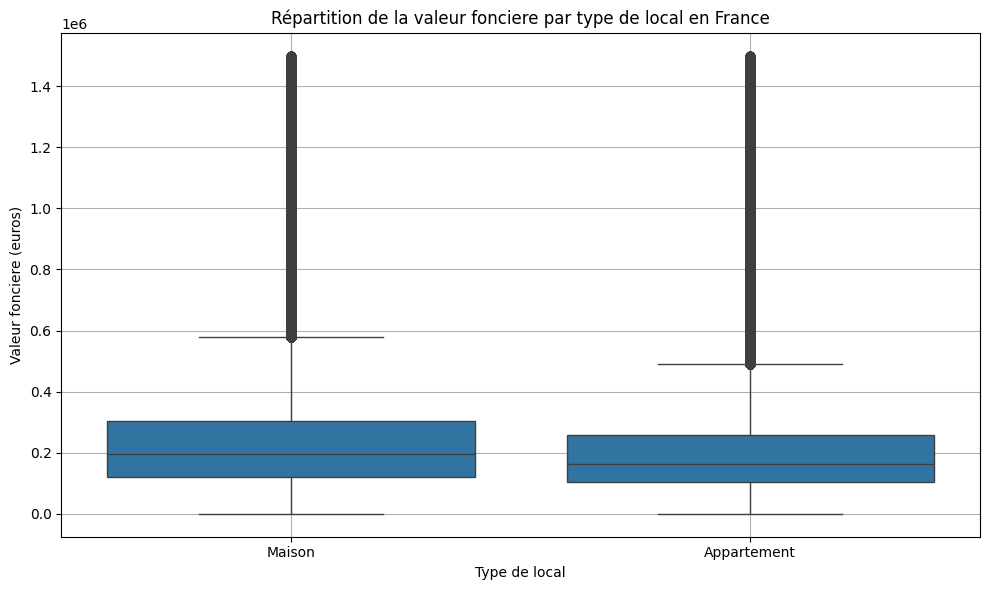

In [ ]:
# regardons la repartition de la valeur fonciere par type de local:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_local', y='valeur_fonciere', data=df_filtre)
plt.title("Répartition de la valeur fonciere par type de local en France")
plt.xlabel("Type de local")
plt.ylabel("Valeur fonciere (euros)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
df['nombre_pieces_principales'].describe()

count    4.750834e+06
mean     3.759971e+00
std      6.170024e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      8.005000e+03
Name: nombre_pieces_principales, dtype: float64

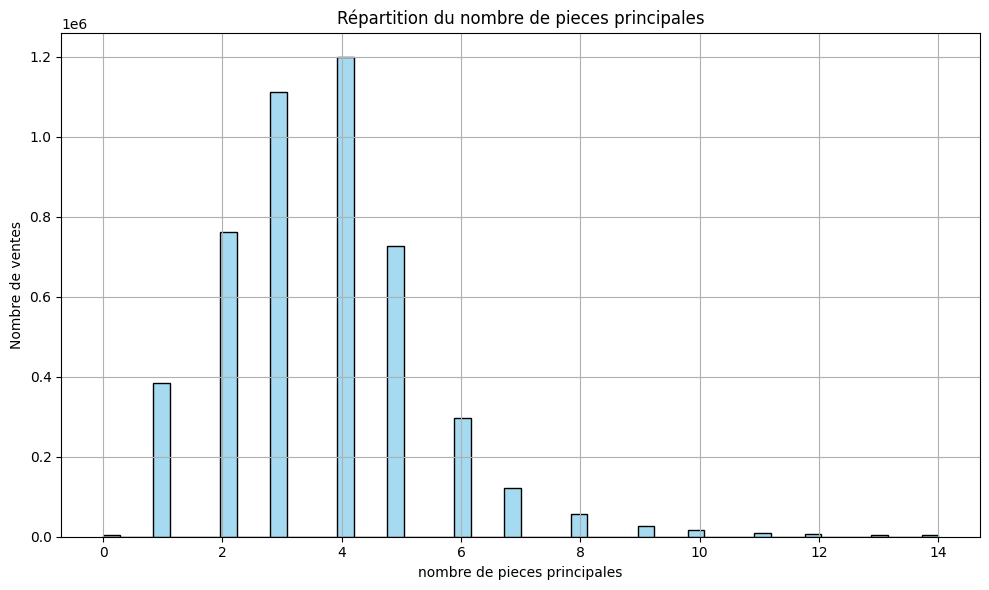

In [51]:
# Option : limiter les valeurs extrêmes pour mieux lire la distribution
df4_filtered = df[df['nombre_pieces_principales'] < 15]

plt.figure(figsize=(10, 6))
sns.histplot(df4_filtered['nombre_pieces_principales'], bins=50, kde=False, color='skyblue')
plt.title("Répartition du nombre de pieces principales")
plt.xlabel("nombre de pieces principales")
plt.ylabel("Nombre de ventes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
#gardons les lignes pour lesquelles le nombre de pieces principales est inferieur a 10:
df_filtre=df[df['nombre_pieces_principales'] < 10]

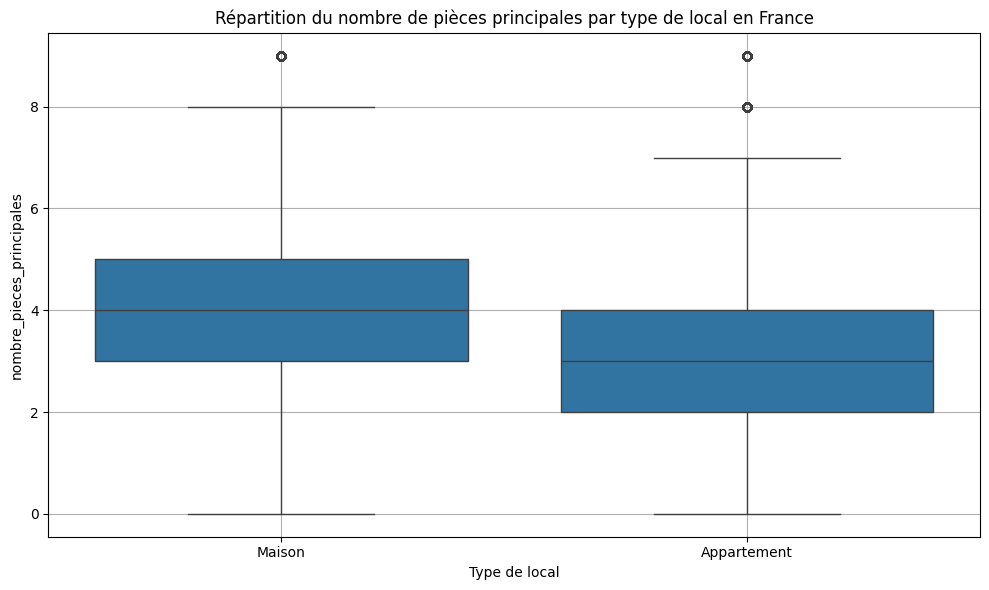

In [53]:
# regardons la repartition de la valeur fonciere par type de local:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_local', y='nombre_pieces_principales', data=df_filtre)
plt.title("Répartition du nombre de pièces principales par type de local en France")
plt.xlabel("Type de local")
plt.ylabel("nombre_pieces_principales")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\antho\AppData\Local\Temp\ipykernel_9676\616934609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtre, y='type_local', order=df_filtre['type_local'].value_counts().index, palette='pastel')


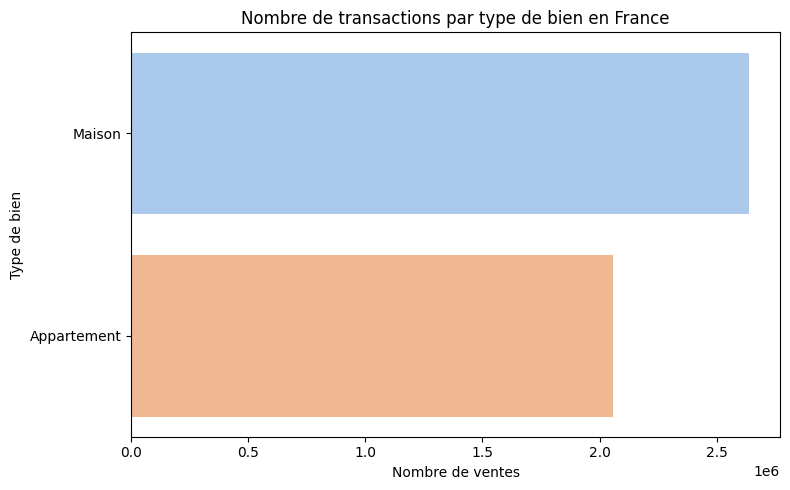

In [54]:
#regardons la repartition des maisons et appartements:

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtre, y='type_local', order=df_filtre['type_local'].value_counts().index, palette='pastel')
plt.title("Nombre de transactions par type de bien en France")
plt.xlabel("Nombre de ventes")
plt.ylabel("Type de bien")
plt.tight_layout()
plt.show()

In [2]:
df_stat2 = pd.read_csv(r"dataset\df_stat2.csv", sep=",")
df_stat2

,code_geo,libelle_geo,code_parent,echelle_geo,nb_ventes_whole_appartement,moy_prix_m2_whole_appartement,med_prix_m2_whole_appartement,nb_ventes_whole_maison,moy_prix_m2_whole_maison,med_prix_m2_whole_maison,...,nb_ventes_whole_local,moy_prix_m2_whole_local,med_prix_m2_whole_local,Population au dernier recensement 2021,Population projetée en 2070 2070,Nombre de personnes en âge de travailler (15-64 ans) 2021,Nombre d'actifs de 15-64 ans 2021,Nombre de chômeurs de 15-64 ans 2021,Médiane du revenu disponible par UC 2020,taux de chomage
0,01,Ain,nation,departement,16201.0,3054.0,2657.0,26887.0,2674.0,2429.0,...,2045.0,1422.0,930.0,663202,754000,411178,323541,29296,24030,9.05
1,02,Aisne,nation,departement,3141.0,1504.0,1281.0,28227.0,1289.0,1227.0,...,1537.0,2071.0,748.0,527468,436000,318948,232558,37878,20300,16.29
2,03,Allier,nation,departement,6487.0,1314.0,1188.0,19575.0,1207.0,1133.0,...,1126.0,889.0,489.0,334872,295000,190747,140212,17602,20990,12.55
3,04,Alpes-de-Haute-Provence,nation,departement,7225.0,2095.0,1943.0,8496.0,2444.0,2355.0,...,775.0,1370.0,1059.0,166077,160000,95922,71402,8909,21130,12.48
4,05,Hautes-Alpes,nation,departement,11549.0,2683.0,2493.0,5218.0,2727.0,2550.0,...,1712.0,2054.0,1932.0,140976,128000,82966,63597,5856,21420,9.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,Essonne,nation,departement,42204.0,3322.0,3119.0,38504.0,3798.0,3469.0,...,3054.0,2868.0,1910.0,1313768,1307000,842158,641102,66320,24410,10.34
92,92,Hauts-de-Seine,nation,departement,93770.0,7133.0,6875.0,11811.0,8563.0,8008.0,...,3888.0,8969.0,5056.0,1635291,1634000,1081015,855354,86366,28810,10.10
93,93,Seine-Saint-Denis,nation,departement,57369.0,4450.0,4122.0,21621.0,4521.0,4040.0,...,2878.0,4218.0,2895.0,1668670,1703000,1096564,796947,130608,18470,16.39
94,94,Val-de-Marne,nation,departement,62254.0,5368.0,5000.0,18129.0,5977.0,5217.0,...,2908.0,5647.0,3492.0,1415367,1456000,930327,706409,82694,23540,11.71


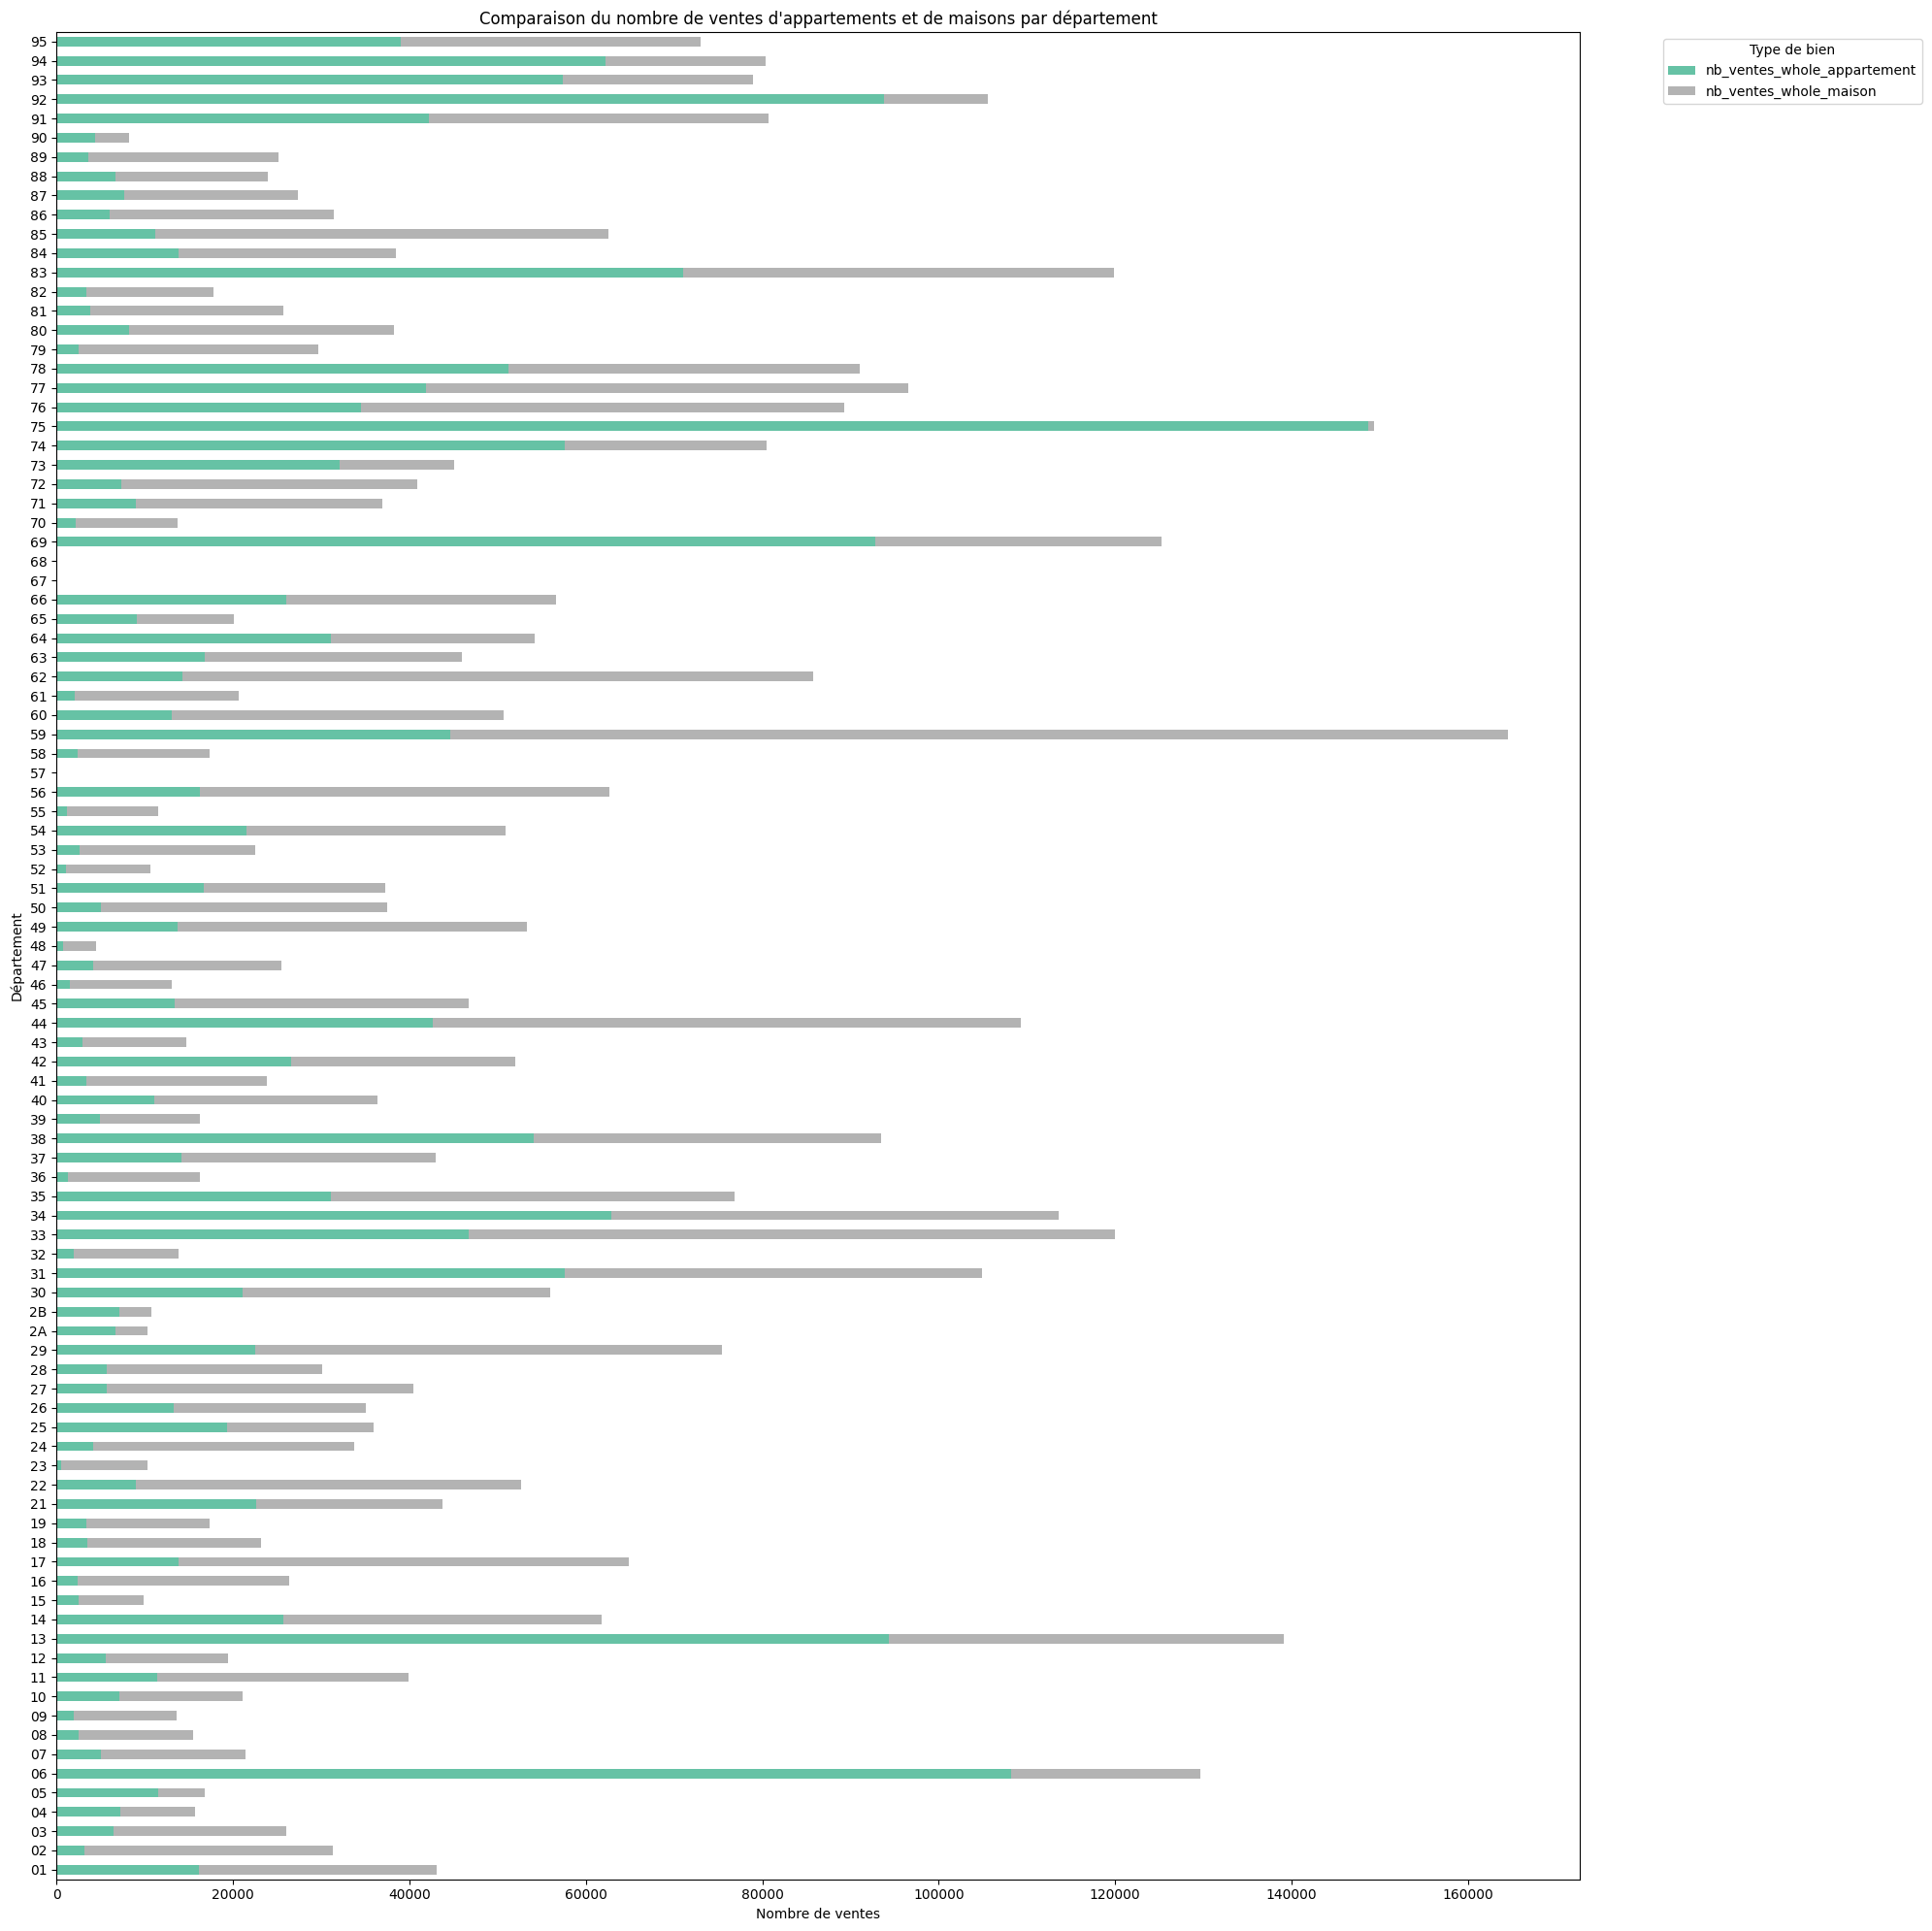

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouper les données par département pour obtenir les totaux des ventes d'appartements et de maisons
df_departement_gpe = df_stat2.groupby('code_geo')[['nb_ventes_whole_appartement', 'nb_ventes_whole_maison']].sum()

# Créer un objet figure et axes avec un figsize approprié
fig, ax = plt.subplots(figsize=(20, 20))  # Vous pouvez ajuster (20, 10) en fonction de vos besoins

# Afficher le graphique à barres empilées horizontales
df_departement_gpe.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')

# Ajouter des labels et un titre
plt.title("Comparaison du nombre de ventes d'appartements et de maisons par département")
plt.xlabel("Nombre de ventes")
plt.ylabel("Département")
plt.xticks(rotation=0)
plt.legend(title="Type de bien", bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\antho\AppData\Local\Temp\ipykernel_9676\1975079924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['date_mutation'] = pd.to_datetime(df_filtre['date_mutation'], errors='coerce')
C:\Users\antho\AppData\Local\Temp\ipykernel_9676\1975079924.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_evol = df_types.groupby([pd.Grouper(key='date_mutation', freq='M'), 'type_local']).size().reset_index(name='nombre')


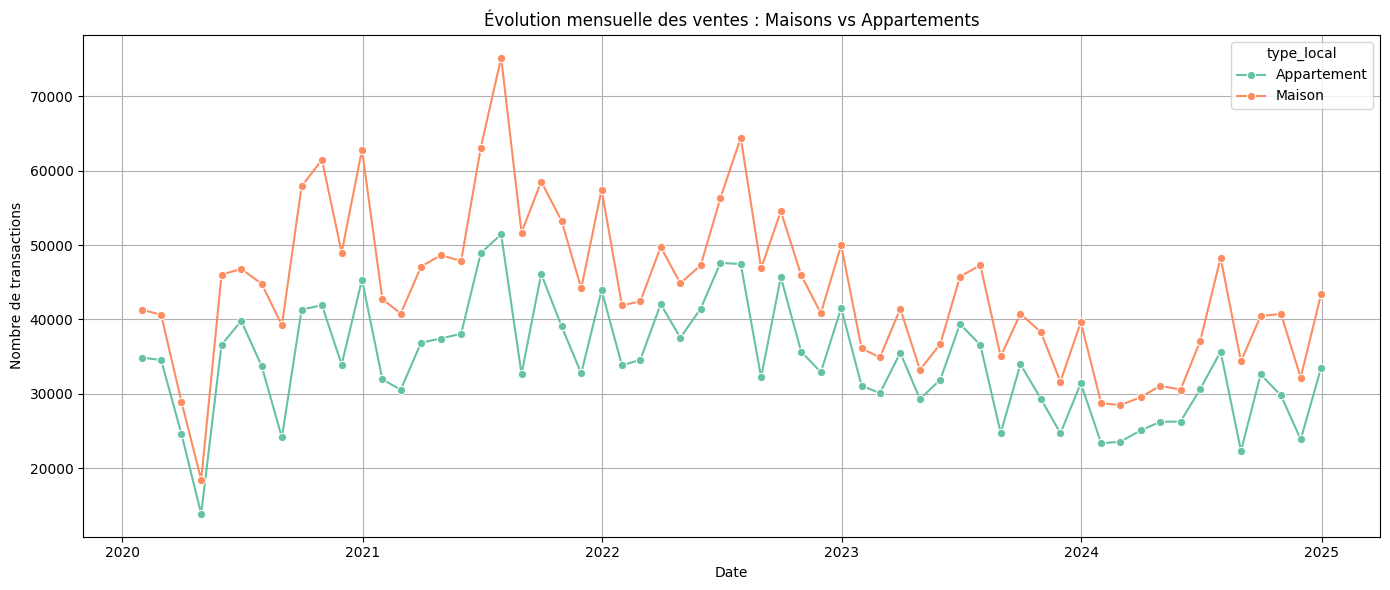

In [68]:

# S'assurer du bon format de date
df_filtre['date_mutation'] = pd.to_datetime(df_filtre['date_mutation'], errors='coerce')

# Filtrer les types de biens
df_types = df_filtre[df_filtre['type_local'].isin(['Maison', 'Appartement'])]

# Grouper par mois et type de bien
df_evol = df_types.groupby([pd.Grouper(key='date_mutation', freq='M'), 'type_local']).size().reset_index(name='nombre')

# Tracer avec seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_evol, x='date_mutation', y='nombre', hue='type_local', marker='o', palette='Set2')

plt.title("Évolution mensuelle des ventes : Maisons vs Appartements")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\antho\AppData\Local\Temp\ipykernel_9676\3182747814.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prix_par_type = df_temp.groupby([pd.Grouper(key='date_mutation', freq='M'), 'type_local'])['prix_m2'].mean().reset_index()


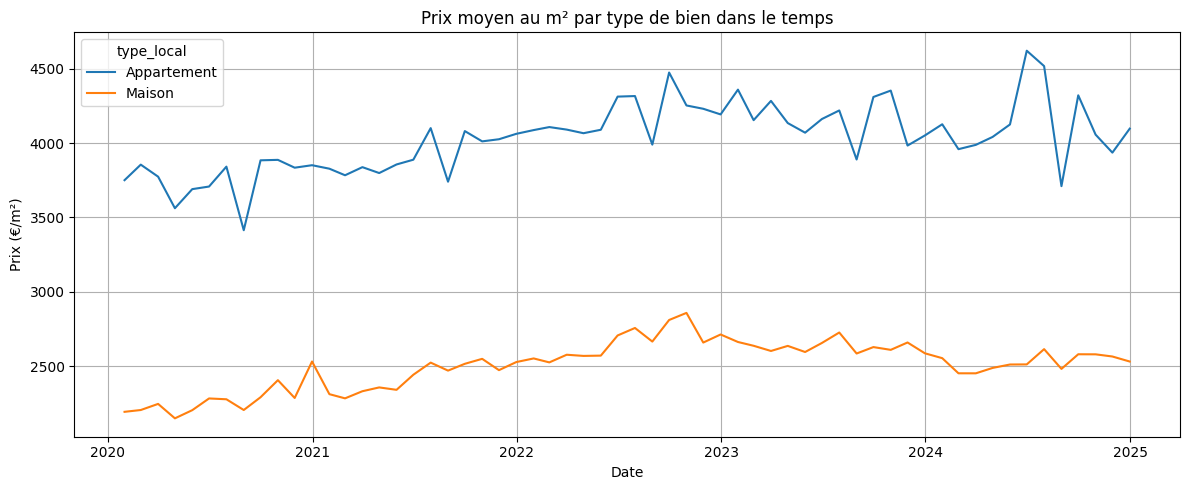

In [67]:
df_temp = df_filtre[df_filtre['type_local'].isin(['Maison', 'Appartement'])]

prix_par_type = df_temp.groupby([pd.Grouper(key='date_mutation', freq='M'), 'type_local'])['prix_m2'].mean().reset_index()

import seaborn as sns

plt.figure(figsize=(12, 5))
sns.lineplot(data=prix_par_type, x='date_mutation', y='prix_m2', hue='type_local')
plt.title("Prix moyen au m² par type de bien dans le temps")
plt.xlabel("Date")
plt.ylabel("Prix (€/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\antho\AppData\Local\Temp\ipykernel_9676\4188729143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['mois_mutation'] = df_filtre['date_mutation'].dt.month


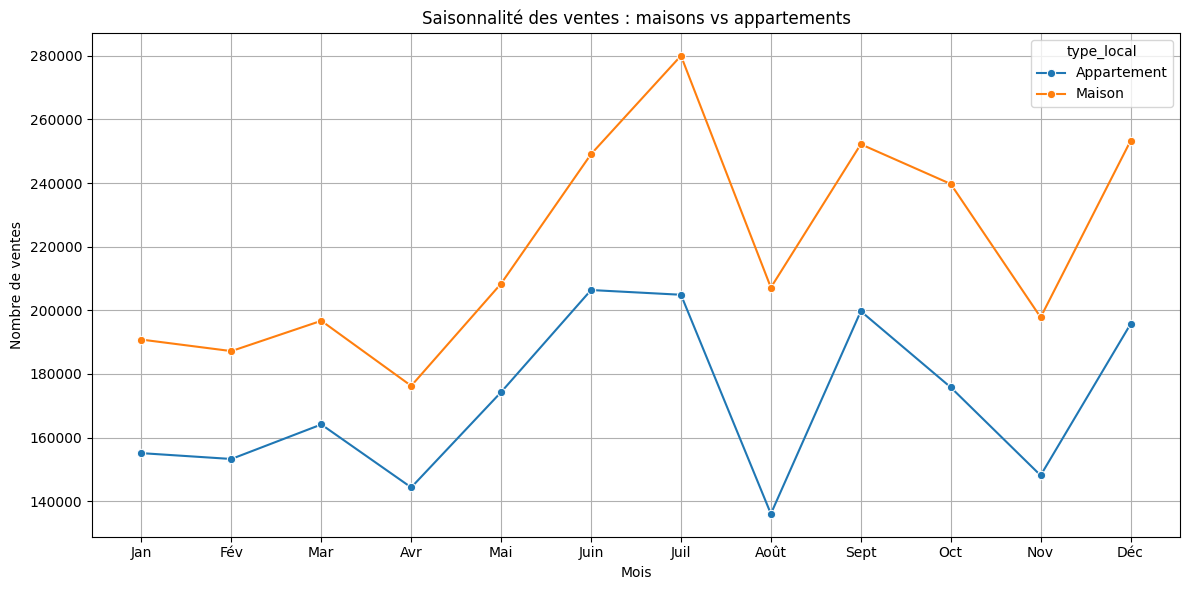

In [69]:
# Observation de la saisonnalité des ventes
df_filtre['mois_mutation'] = df_filtre['date_mutation'].dt.month

df_types = df_filtre[df_filtre['type_local'].isin(['Maison', 'Appartement'])]
df_types['mois_mutation'] = df_types['date_mutation'].dt.month

df_mois_type = df_types.groupby(['mois_mutation', 'type_local']).size().reset_index(name='nombre')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mois_type, x='mois_mutation', y='nombre', hue='type_local', marker='o')
plt.title("Saisonnalité des ventes : maisons vs appartements")
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin',
    'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'
])
plt.grid(True)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Prix moyen m² vs Médiane du revenu disponible par UC 2020')

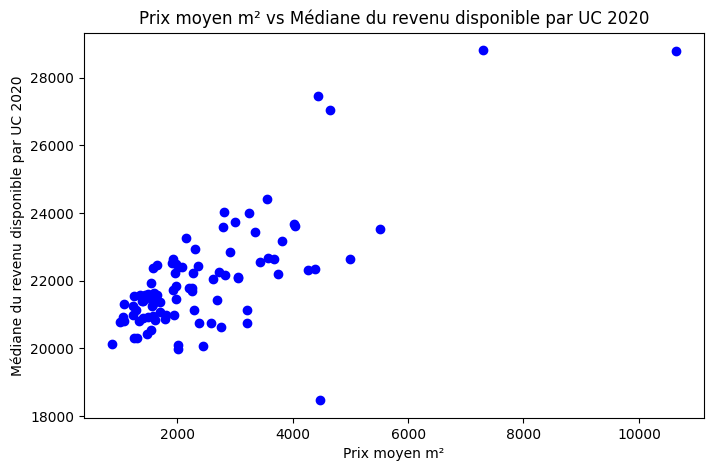

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df_stat2['moy_prix_m2_whole_apt_maison'], y=df_stat2['Médiane du revenu disponible par UC 2020'], color='blue')
plt.xlabel('Prix moyen m²')
plt.ylabel('Médiane du revenu disponible par UC 2020')
plt.title('Prix moyen m² vs Médiane du revenu disponible par UC 2020')

In [ ]:
# Corrélation positive élevée (0.73) etre la médiane du revenu disponible en 2020 et le prix moyen au m2 (appartemetn et maison confondus)
df_stat2['moy_prix_m2_whole_apt_maison'].corr(df_stat2['Médiane du revenu disponible par UC 2020'])

np.float64(0.7331827691848942)

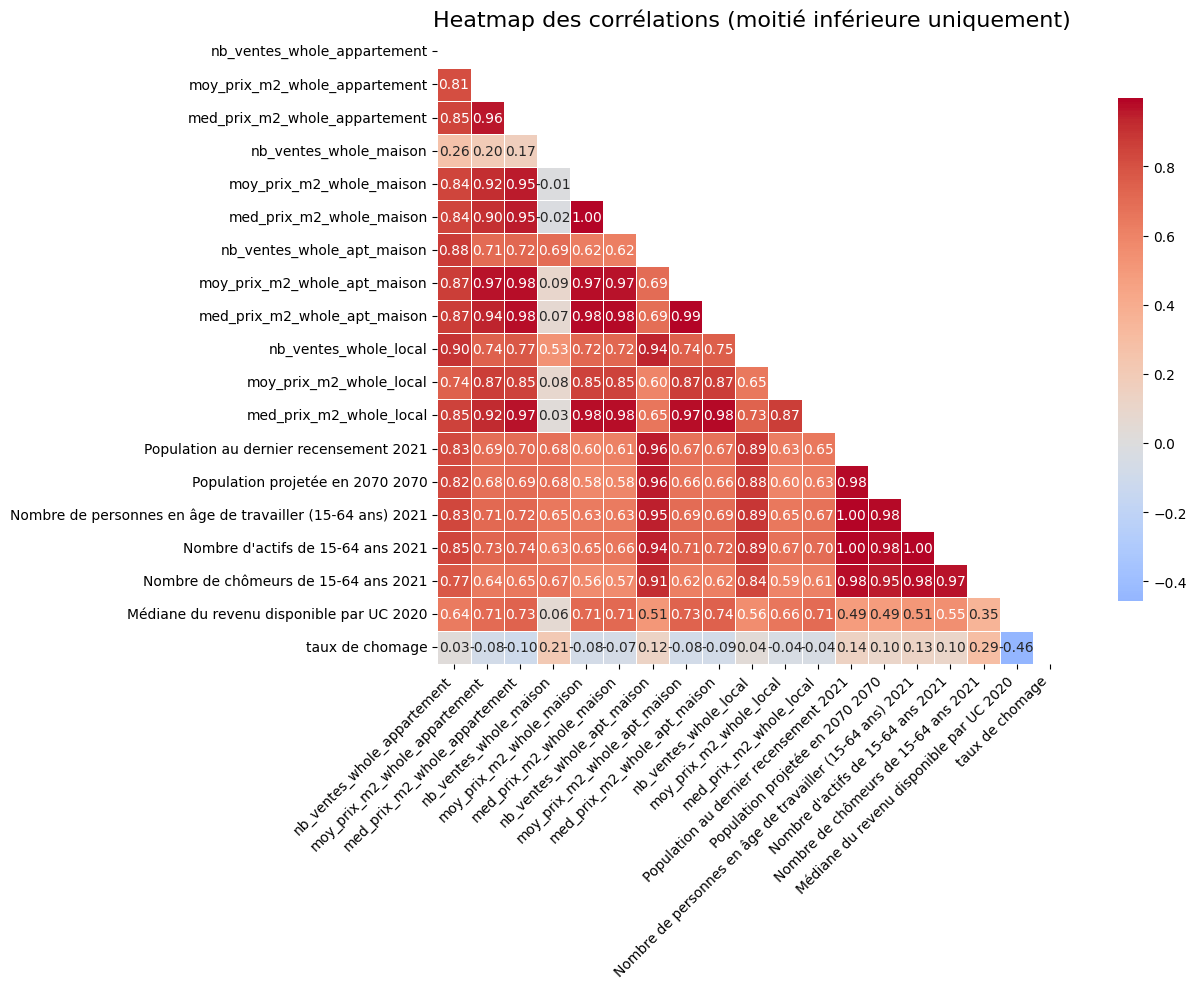

In [9]:
import seaborn as sns
import numpy as np
# Sélection des colonnes numériques
colonnes_numeriques = df_stat2.select_dtypes(include='number')

matrice_corr = colonnes_numeriques.corr()

# Calcul du masque triangulaire supérieur
masque = np.triu(matrice_corr)

# Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    matrice_corr,
    mask=masque,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    center=0
)

plt.title("Heatmap des corrélations (moitié inférieure uniquement)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
# Le taux de chomage n'est pas corrélé ni avec le prix/m2 ni avec le nombre de ventes